 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [2]:
cd resources

C:\Users\dougl\Bootcamp\Course Material\Fintech_homework\Week_Four\Starter_Code\resources


# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

### Read CSV Files into DataFrames

In [3]:
whale_returns = Path("whale_returns.csv")
algo_returns = Path ("algo_returns.csv")
sp_tsx_history = Path ("sp_tsx_history.csv")

In [4]:
whale_returns_dataframes = pd.read_csv(whale_returns)
algo_return_dataframe = pd.read_csv(algo_returns)
sp_tsx_history_dataframe = pd.read_csv(sp_tsx_history)

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [5]:
# Reading whale returns
whale_returns_dataframes.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [6]:
# Count nulls
whale_returns_dataframes.isnull().mean() * 100

Date                           0.00000
SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [7]:
# Drop nulls
whale_returns_dataframes = whale_returns_dataframes.dropna().copy()
whale_returns_dataframes.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [8]:
# Fix dateframes
whale_returns_dataframes.set_index(pd.to_datetime(whale_returns_dataframes['Date'], infer_datetime_format=True), inplace=True)
whale_returns_dataframes.drop(columns=["Date"], inplace=True)
whale_returns_dataframes.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [9]:
# Reading algorithmic returns
algo_return_dataframe.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [10]:
algo_return_dataframe.dtypes

Date       object
Algo 1    float64
Algo 2    float64
dtype: object

In [11]:
# Count nulls
algo_return_dataframe.isnull().mean() * 100

Date      0.000000
Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [12]:
# Drop nulls
algo_return_dataframe = algo_return_dataframe.dropna().copy()

In [13]:
algo_return_dataframe.isnull().sum()

Date      0
Algo 1    0
Algo 2    0
dtype: int64

In [14]:
# Fix dateframes
algo_return_dataframe.set_index(pd.to_datetime(algo_return_dataframe['Date'], infer_datetime_format=True), inplace=True)
algo_return_dataframe.drop(columns=["Date"], inplace=True)
algo_return_dataframe.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [15]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_dataframe.head()

,Date,Close
0,1-Oct-2012,"$12,370.19"
1,2-Oct-2012,"$12,391.23"
2,3-Oct-2012,"$12,359.47"
3,4-Oct-2012,"$12,447.68"
4,5-Oct-2012,"$12,418.99"


In [16]:
# Check Data Types
sp_tsx_history_dataframe.dtypes

Date     object
Close    object
dtype: object

In [17]:
# Fix Data Types
sp_tsx_history_dataframe ["Close"] = sp_tsx_history_dataframe["Close"].str.replace("$", "", regex=True).str.replace(",", "", regex=True).astype(float)
sp_tsx_history_dataframe.dtypes

Date      object
Close    float64
dtype: object

In [18]:
sp_tsx_history_dataframe.head()

,Date,Close
0,1-Oct-2012,12370.19
1,2-Oct-2012,12391.23
2,3-Oct-2012,12359.47
3,4-Oct-2012,12447.68
4,5-Oct-2012,12418.99


In [19]:
# Fix dateframe
sp_tsx_history_dataframe.set_index(pd.to_datetime(sp_tsx_history_dataframe['Date'], infer_datetime_format=True), inplace=True)
sp_tsx_history_dataframe.drop(columns=["Date"], inplace=True)
sp_tsx_history_dataframe.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [20]:
# Calculate Daily Returns
sp_tsx_returns = sp_tsx_history_dataframe.pct_change()
sp_tsx_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [21]:
# Drop nulls
sp_tsx_returns.isnull().mean() * 100 

Close    0.055006
dtype: float64

In [22]:
sp_tsx_returns = sp_tsx_returns.dropna().copy()

In [23]:
sp_tsx_returns.isnull().sum()

Close    0
dtype: int64

In [24]:
sp_tsx_returns.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [25]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_returns = sp_tsx_returns.rename(columns={"Close":"S&P"})

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [26]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
portfolio_returns = pd.concat([whale_returns_dataframes, algo_return_dataframe,sp_tsx_returns], axis="columns", join="inner")
portfolio_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

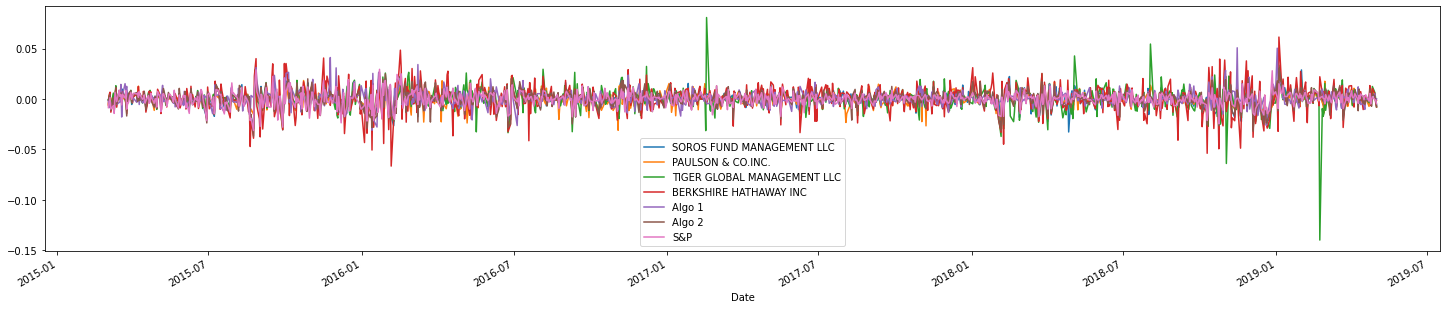

In [27]:
# Plot daily returns of all portfolios
portfolio_returns.plot(figsize=(25,5))

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns for Portfolio'}, xlabel='Date'>

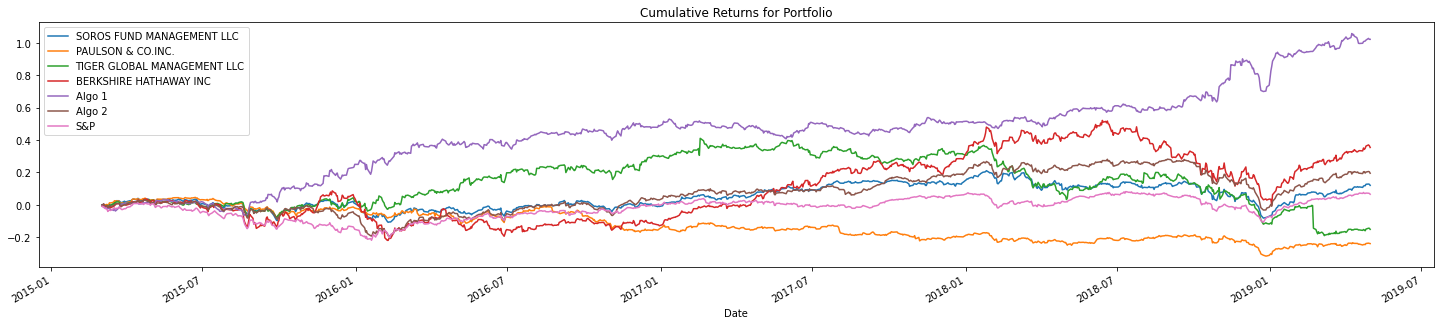

In [28]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + portfolio_returns).cumprod() - 1
cumulative_returns
# Plot cumulative returns
cumulative_returns.plot(figsize=(25,5), title="Cumulative Returns for Portfolio")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

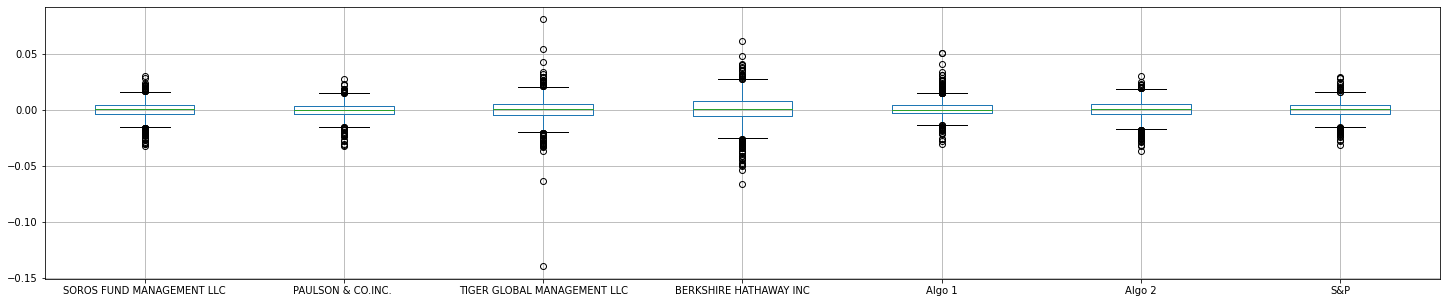

In [29]:
# Box plot to visually show risk
portfolio_returns.boxplot(figsize=(25,5))

In [30]:
# Calculate the daily standard deviations of all portfolios
portfolio_returns.std()

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P                            0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [31]:
#Answer: Algo 1 is a riskier stock than S&P TSX 60.

### Calculate the Annualized Standard Deviation

<AxesSubplot:title={'center':'Standard Deviation - 252 Trading Days'}, xlabel='Date'>

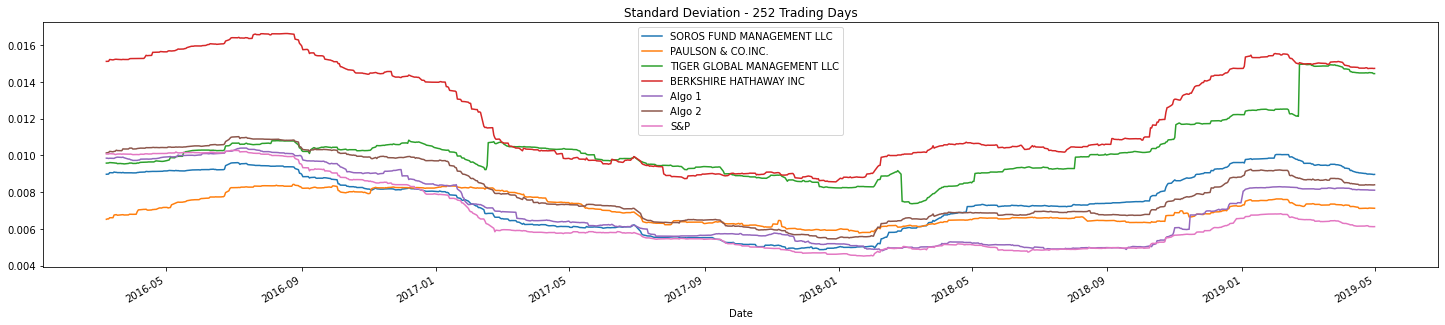

In [32]:
# Calculate the annualized standard deviation (252 trading days)
portfolio_returns.rolling(window=252).std().plot(figsize=(25,5), title="Standard Deviation - 252 Trading Days")

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [33]:
# Calculate the annualized `std`
portfolio_std_1 = portfolio_returns.std()
portfolio_std_1

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P                            0.007034
dtype: float64

In [34]:
portfolio_annual_std = portfolio_std_1 * np.sqrt(252)
portfolio_annual_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P                            0.111664
dtype: float64

<AxesSubplot:ylabel='Frequency'>

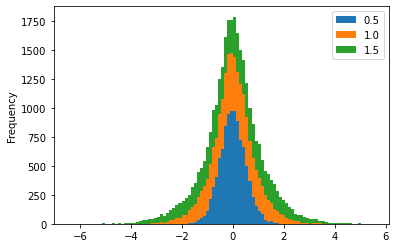

In [35]:
portfolio_annual_a_std = np.random.normal(scale=0.5, size=10000)
portfolio_annual_b_std = np.random.normal(scale=1.0, size=10000)
portfolio_annual_c_std = np.random.normal(scale=1.5, size=10000)

portfolio_annual_std_x = pd.DataFrame({
    "0.5": portfolio_annual_a_std,
    "1.0": portfolio_annual_b_std,
    "1.5": portfolio_annual_c_std
})

portfolio_annual_std_x.plot.hist(stacked=True, bins=100)

<AxesSubplot:title={'center':'Standard Deviation - 21 Days'}, xlabel='Date'>

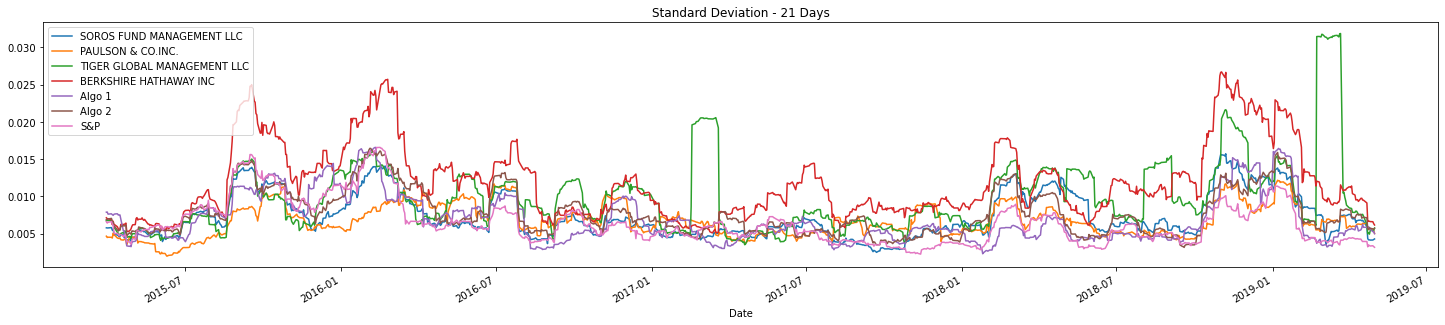

In [36]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
portfolio_returns.rolling(window=21).std().plot(figsize=(25,5), title="Standard Deviation - 21 Days")

### Calculate and plot the correlation

In [37]:
import seaborn as sns

<AxesSubplot:ylabel='Date'>

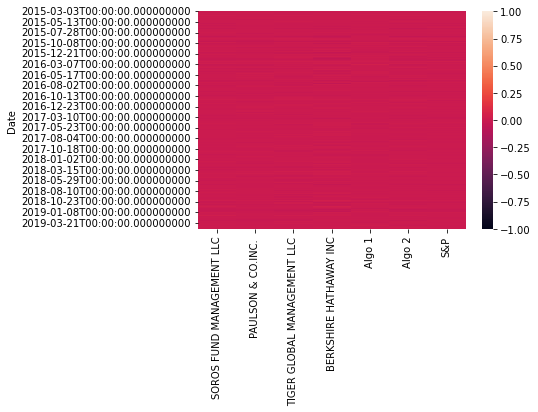

In [38]:
# Calculate the correlation
portfolio_returns.corr()

# Display de correlation matrix
sns.heatmap(portfolio_returns, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [39]:
# Calculate covariance of a single 
covariance_SFM = portfolio_returns['SOROS FUND MANAGEMENT LLC'].cov(portfolio_returns['S&P'])
covariance_Tiger = portfolio_returns['TIGER GLOBAL MANAGEMENT LLC'].cov(portfolio_returns['S&P'])
covariance_Paulson = portfolio_returns['PAULSON & CO.INC. '].cov(portfolio_returns['S&P'])
covariance_Berkshire = portfolio_returns['BERKSHIRE HATHAWAY INC'].cov(portfolio_returns['S&P'])
covariance_Algo_1 = portfolio_returns['Algo 1'].cov(portfolio_returns['S&P'])
covariance_Algo_2 = portfolio_returns['Algo 2'].cov(portfolio_returns['S&P'])

In [40]:
covariance_SFM

3.7106899078552236e-05

In [41]:
covariance_Tiger

3.3727241494354994e-05

In [42]:
covariance_Paulson

2.3894916563613424e-05

In [43]:
covariance_Berkshire

5.027336077110012e-05

In [44]:
covariance_Algo_1

1.6563000308911375e-05

In [45]:
covariance_Algo_2

4.3187044300842554e-05

In [46]:
# Calculate variance of S&P TSX
variance = portfolio_returns['S&P'].var()
variance

4.9479515915131015e-05

#### Computing beta

In [47]:
# Computing beta SFM

SFM_beta = covariance_SFM/variance
SFM_beta

0.7499446668435333

In [48]:
# Computing beta Tiger

Tiger_beta = covariance_Tiger/variance
Tiger_beta

0.6816404904244644

In [49]:
# Computing beta Paulson

Paulson_beta = covariance_Paulson/variance
Paulson_beta

0.48292543129562576

In [50]:
# Computing beta Berkshire

Berkshire_beta = covariance_Berkshire/variance
Berkshire_beta

1.0160439091063609

In [51]:
# Computing beta Algo 1

Algo1_beta = covariance_Algo_1/variance
Algo1_beta

0.3347445908185684

In [52]:
# Computing beta Algo 2

Algo2_beta = covariance_Algo_2/variance
Algo2_beta

0.872826734499959

##### Selected Berkshire to Calculate 60-day rolling

<AxesSubplot:title={'center':'Rolling 60-Day Covariance of Berkshire Returns vs. S&P TSX Returns'}, xlabel='Date'>

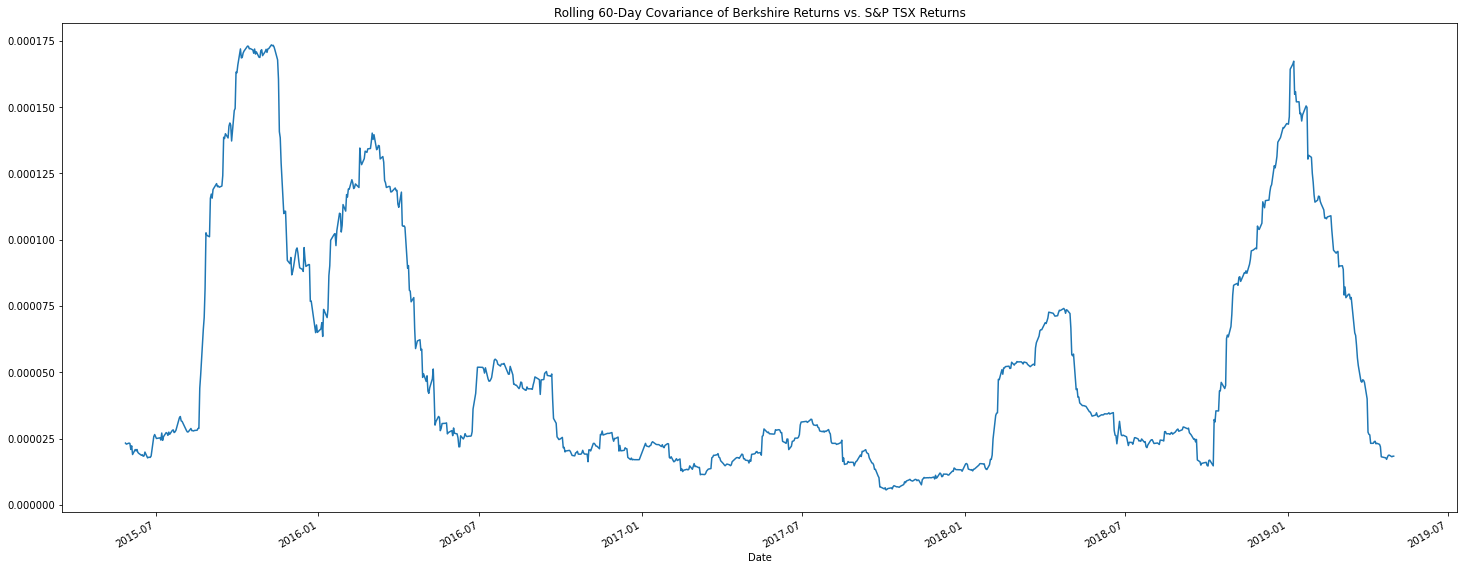

In [53]:
rolling_covariance = portfolio_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(portfolio_returns['S&P'])
rolling_covariance.plot(figsize=(25, 10), title='Rolling 60-Day Covariance of Berkshire Returns vs. S&P TSX Returns')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [54]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [55]:
# Annualized Sharpe Ratios
sharpe_ratios = ((portfolio_returns.mean()) * 252) / (portfolio_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P                            0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

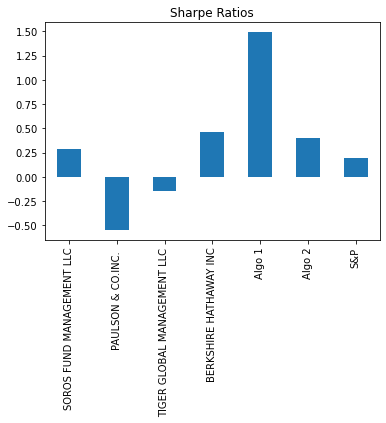

In [56]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

### Stock 1: Twitter

In [57]:
# Reading data from 1st stock
TWTR = Path("TWTR.csv")
TWTR_df = pd.read_csv(TWTR)
TWTR_df.head() ;

In [58]:
TWTR_df.set_index(pd.to_datetime(TWTR_df['Date'], infer_datetime_format=True), inplace=True)
TWTR_df.drop(columns=["Date", "Open", "High", "Low", "Close", "Volume"], inplace=True)
TWTR_df.head()

,Adj Close
Date,
2018-01-16,24.660000
2018-01-17,24.559999
2018-01-18,24.040001
2018-01-19,23.660000
2018-01-22,23.320000


In [59]:
TWTR_df = TWTR_df.rename(columns={"Adj Close":"TWTR"})

In [60]:
TWTR_df_std = TWTR_df.pct_change()
TWTR_df_std.head()

,TWTR
Date,
2018-01-16,NaN
2018-01-17,-0.004055
2018-01-18,-0.021173
2018-01-19,-0.015807
2018-01-22,-0.014370


In [61]:
TWTR_df.dtypes ;

### Stock 2: Bank of Montreal

In [62]:
# Reading data from 2nd stock
BMO = ("BMO.csv")
BMO_df = pd.read_csv(BMO)
BMO_df.head() ;

In [63]:
BMO_df.set_index(pd.to_datetime(BMO_df['Date'], infer_datetime_format=True), inplace=True)
BMO_df.drop(columns=["Date", "Open", "High", "Low", "Close", "Volume"], inplace=True)
BMO_df.head()

,Adj Close
Date,
2018-01-16,70.734932
2018-01-17,71.214500
2018-01-18,71.505669
2018-01-19,71.514236
2018-01-22,71.933838


In [64]:
BMO_df = BMO_df.rename(columns={"Adj Close":"BMO"})

In [65]:
BMO_df_std = BMO_df.pct_change()
BMO_df_std.head()

,BMO
Date,
2018-01-16,NaN
2018-01-17,0.006780
2018-01-18,0.004089
2018-01-19,0.000120
2018-01-22,0.005867


In [66]:
BMO_df.dtypes ;

### Stock 3: Vanguard Health Care Index Fund (VHT)

In [67]:
# Reading data from 3rd stock
VHT = ("VHT.csv")
VHT_df = pd.read_csv(VHT)
VHT_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-16,163.000000,163.779999,161.899994,162.089996,152.225479,549200
1,2018-01-17,163.080002,164.000000,162.630005,163.720001,153.756271,394000
2,2018-01-18,163.679993,163.880005,162.860001,163.759995,153.793869,152800
3,2018-01-19,163.940002,164.529999,163.710007,164.520004,154.507629,160000
4,2018-01-22,164.589996,166.179993,164.520004,166.179993,156.066589,201000


In [68]:
VHT_df.set_index(pd.to_datetime(VHT_df['Date'], infer_datetime_format=True), inplace=True)
VHT_df.drop(columns=["Date", "Open", "High", "Low", "Close", "Volume"], inplace=True)
VHT_df.head()

,Adj Close
Date,
2018-01-16,152.225479
2018-01-17,153.756271
2018-01-18,153.793869
2018-01-19,154.507629
2018-01-22,156.066589


In [69]:
VHT_df = VHT_df.rename(columns={"Adj Close":"VHT"})

In [70]:
VHT_df_std = VHT_df.pct_change()
VHT_df_std.head()

,VHT
Date,
2018-01-16,NaN
2018-01-17,0.010056
2018-01-18,0.000245
2018-01-19,0.004641
2018-01-22,0.010090


## Combine all stocks into  single DF

In [71]:
# Combine all stocks in a single DataFrame
DT_portfolio = pd.concat([TWTR_df_std, BMO_df_std,VHT_df_std], axis="columns", join="inner")
DT_portfolio

,TWTR,BMO,VHT
Date,,,
2018-01-16,NaN,NaN,NaN
2018-01-17,-0.004055,0.006780,0.010056
2018-01-18,-0.021173,0.004089,0.000245
2018-01-19,-0.015807,0.000120,0.004641
2018-01-22,-0.014370,0.005867,0.010090
...,...,...,...
2019-01-07,0.046411,0.004013,0.008885
2019-01-08,0.014678,0.011695,0.010730
2019-01-09,0.014151,0.015950,0.003927


In [72]:
# Clean up null values
DT_portfolio.isnull().mean() * 100 

TWTR    0.4
BMO     0.4
VHT     0.4
dtype: float64

In [73]:
DT_portfolio = DT_portfolio.dropna().copy()
DT_portfolio.isnull().sum()

TWTR    0
BMO     0
VHT     0
dtype: int64

In [74]:
DT_portfolio.head()

,TWTR,BMO,VHT
Date,,,
2018-01-17,-0.004055,0.006780,0.010056
2018-01-18,-0.021173,0.004089,0.000245
2018-01-19,-0.015807,0.000120,0.004641
2018-01-22,-0.014370,0.005867,0.010090
2018-01-23,-0.024443,-0.000357,-0.002287


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [75]:
# Set weights

weights = [0.33, 0.33, 0.33]

DT_portfolio_returns = DT_portfolio.dot(weights)
DT_portfolio_returns.head()

Date
2018-01-17    0.004218
2018-01-18   -0.005557
2018-01-19   -0.003645
2018-01-22    0.000524
2018-01-23   -0.008938
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [76]:
# Join your returns DataFrame to the original returns DataFrame
combined_portfolio = pd.concat([portfolio_returns, DT_portfolio], axis="columns", join="inner")
combined_portfolio.head()

# For the purpose of this exercise, I had to change the stock values to reflect 2018-19.

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P,TWTR,BMO,VHT
Date,,,,,,,,,,
2018-01-17,0.008249,-0.002485,0.013650,0.008472,-0.000312,0.007632,0.001707,-0.004055,0.006780,0.010056
2018-01-18,0.002361,-0.000724,-0.007388,-0.000717,0.000776,-0.003683,-0.002587,-0.021173,0.004089,0.000245
2018-01-19,0.004771,0.001870,0.005331,0.003258,-0.001067,0.007944,0.004237,-0.015807,0.000120,0.004641
2018-01-22,0.007716,0.009471,0.007179,0.003236,0.000157,0.007071,-0.000335,-0.014370,0.005867,0.010090
2018-01-23,0.000211,0.000202,0.001084,0.008253,0.002182,0.002544,0.000585,-0.024443,-0.000357,-0.002287


In [77]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_portfolio.isnull().mean() * 100 

SOROS FUND MANAGEMENT LLC      0.0
PAULSON & CO.INC.              0.0
TIGER GLOBAL MANAGEMENT LLC    0.0
BERKSHIRE HATHAWAY INC         0.0
Algo 1                         0.0
Algo 2                         0.0
S&P                            0.0
TWTR                           0.0
BMO                            0.0
VHT                            0.0
dtype: float64

In [78]:
combined_portfolio = combined_portfolio.dropna().copy()
combined_portfolio.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P                            0
TWTR                           0
BMO                            0
VHT                            0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [79]:
# Calculate the annualized `std`
combined_std = combined_portfolio.std()
combined_std

SOROS FUND MANAGEMENT LLC      0.009912
PAULSON & CO.INC.              0.007585
TIGER GLOBAL MANAGEMENT LLC    0.012596
BERKSHIRE HATHAWAY INC         0.015425
Algo 1                         0.008340
Algo 2                         0.009206
S&P                            0.006837
TWTR                           0.036594
BMO                            0.009071
VHT                            0.011180
dtype: float64

In [80]:
annual_std = combined_std * np.sqrt(252)
annual_std

SOROS FUND MANAGEMENT LLC      0.157352
PAULSON & CO.INC.              0.120404
TIGER GLOBAL MANAGEMENT LLC    0.199953
BERKSHIRE HATHAWAY INC         0.244857
Algo 1                         0.132389
Algo 2                         0.146141
S&P                            0.108528
TWTR                           0.580908
BMO                            0.143995
VHT                            0.177476
dtype: float64

<AxesSubplot:ylabel='Frequency'>

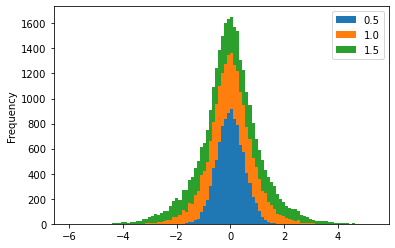

In [81]:
annual_a_std = np.random.normal(scale=0.5, size=10000)
annual_b_std = np.random.normal(scale=1.0, size=10000)
annual_c_std = np.random.normal(scale=1.5, size=10000)

portfolio_std = pd.DataFrame({
    "0.5": annual_a_std,
    "1.0": annual_b_std,
    "1.5": annual_c_std
})

portfolio_std.plot.hist(stacked=True, bins=100)

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Standard Deviation Portfolio - 21 Days'}, xlabel='Date'>

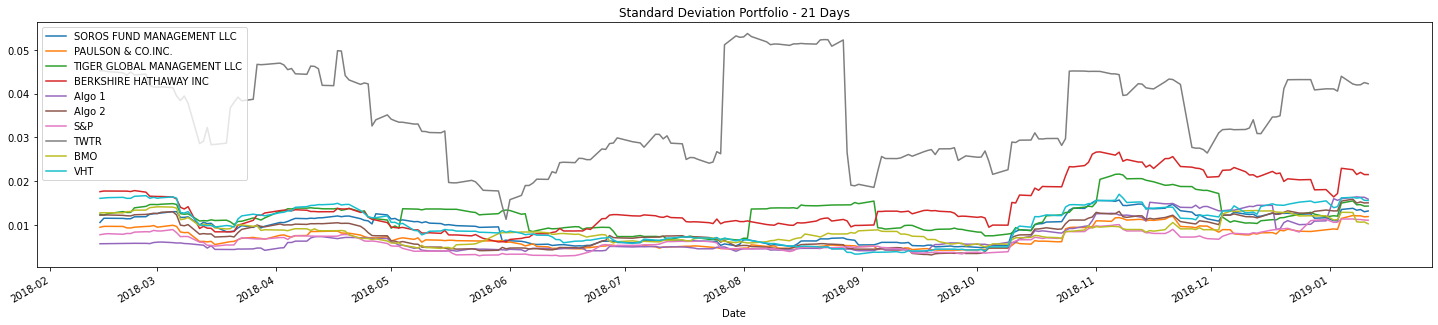

In [95]:
# Calculate rolling standard deviation
# Plot rolling standard deviation
combined_portfolio.rolling(window=21).std().plot(figsize=(25,5), title="Standard Deviation Portfolio - 21 Days")

### Calculate and plot the correlation

In [88]:
# Calculate and plot the correlation

# Calculate the correlation
combined_portfolio.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P,TWTR,BMO,VHT
SOROS FUND MANAGEMENT LLC,1.000000,0.778765,0.634474,0.793212,0.359967,0.845237,0.698354,0.445876,0.638784,0.777263
PAULSON & CO.INC.,0.778765,1.000000,0.687865,0.670237,0.386135,0.824068,0.666172,0.302172,0.644971,0.788604
TIGER GLOBAL MANAGEMENT LLC,0.634474,0.687865,1.000000,0.523717,0.194343,0.643849,0.543056,0.241936,0.504345,0.678189
BERKSHIRE HATHAWAY INC,0.793212,0.670237,0.523717,1.000000,0.337225,0.793126,0.663561,0.547012,0.573834,0.745512
Algo 1,0.359967,0.386135,0.194343,0.337225,1.000000,0.390036,0.320327,0.146090,0.291694,0.242630
Algo 2,0.845237,0.824068,0.643849,0.793126,0.390036,1.000000,0.774170,0.470480,0.699349,0.836393
S&P,0.698354,0.666172,0.543056,0.663561,0.320327,0.774170,1.000000,0.304446,0.694606,0.697864
TWTR,0.445876,0.302172,0.241936,0.547012,0.146090,0.470480,0.304446,1.000000,0.193101,0.362555
BMO,0.638784,0.644971,0.504345,0.573834,0.291694,0.699349,0.694606,0.193101,1.000000,0.621505
VHT,0.777263,0.788604,0.678189,0.745512,0.242630,0.836393,0.697864,0.362555,0.621505,1.000000


<AxesSubplot:ylabel='Date'>

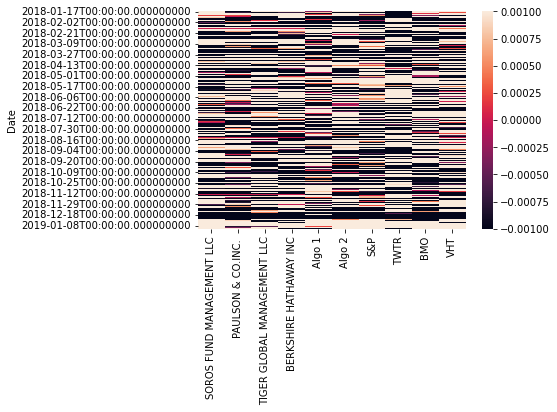

In [87]:
# Display de correlation matrix
sns.heatmap(combined_portfolio, vmin=-.001, vmax=.001)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Covariance of DT_Portfolio vs. S&P TSX Returns'}, xlabel='Date'>

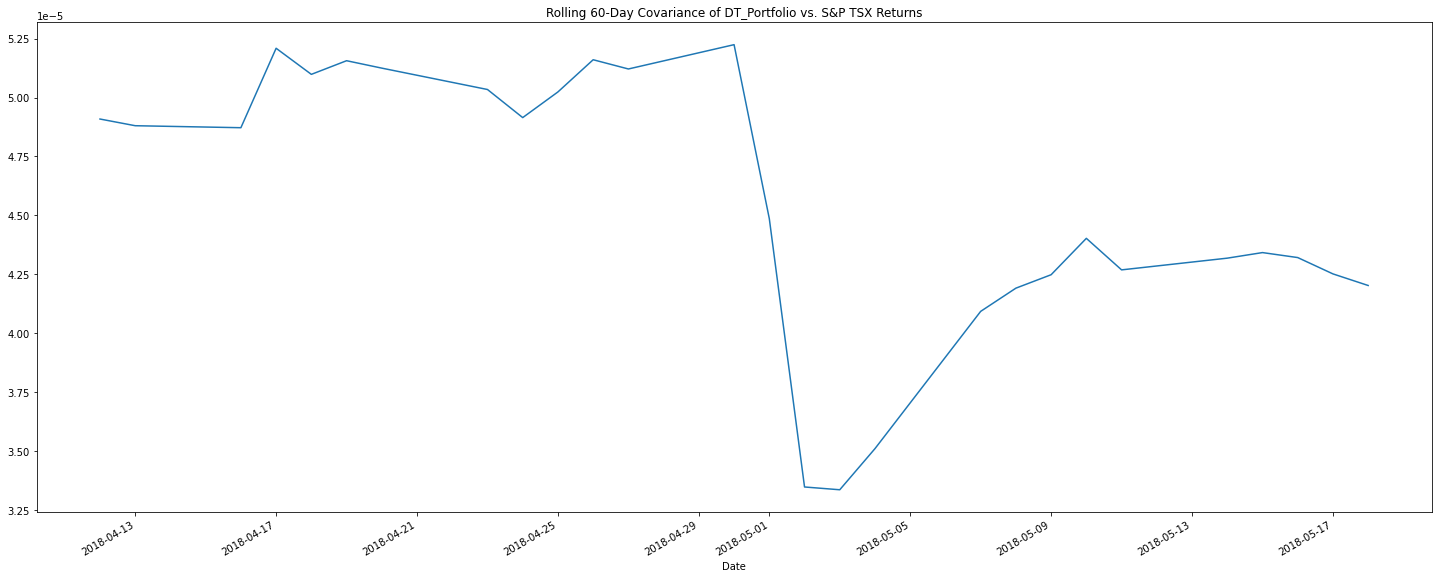

In [89]:
# Calculate and plot Beta

covariance_SFM = portfolio_returns['SOROS FUND MANAGEMENT LLC'].cov(portfolio_returns['S&P'])

new_rolling_covariance = DT_portfolio_returns.rolling(window=60).cov(portfolio_returns['S&P'])
new_rolling_covariance.plot(figsize=(25, 10), title='Rolling 60-Day Covariance of DT_Portfolio vs. S&P TSX Returns')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [92]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_new = ((DT_portfolio.mean()) * 252) / (DT_portfolio_returns.std() * np.sqrt(252))
sharpe_ratios_new

TWTR    1.898905
BMO    -0.530536
VHT     0.187593
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

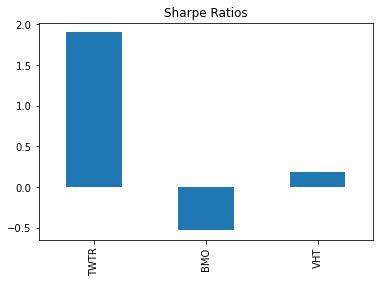

In [93]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_new.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

DT Portfolio performed stronger for a 12-month period compared to the Whale Investors Portfolio, Algo 1 and Algo 2. However, unlike the Whale Investors Portfolio, DT Portfolio leverage of the dominance displayed by TWTR with BMO and VHT tend to follow the market trends. 